In [1]:
import json,sys,random
import numpy as np
import pandas as pd

In [2]:
f=open(r'C:\Users\wlpch\Documents\sab\Ships in Satellite Imagery\shipsnet.json')
dataset=json.load(f)
f.close()

In [3]:
dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [4]:
input_data=np.array(dataset['data'])
output_data=np.array(dataset['labels'])

In [5]:
input_data.shape

(4000, 19200)

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#X_train,X_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,shuffle=True)
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3,shuffle=True)

In [8]:
output_data.shape

(4000,)

In [9]:
X=0

In [10]:
channels=3
width=80
hieght=80

X=input_data.reshape(-1,3,width,hieght).transpose(0,2,3,1)
X.shape

(4000, 80, 80, 3)

(80, 80, 3)


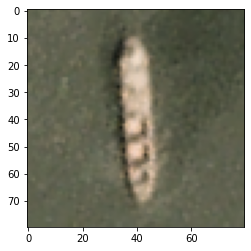

In [11]:
print(X[500].shape)
sample_pic = X[500]
plt.imshow(sample_pic)

In [12]:
type(sample_pic)

numpy.ndarray

In [13]:
from skimage import color

In [14]:
sample_pic_gr = color.rgb2gray(sample_pic)

(80, 80)


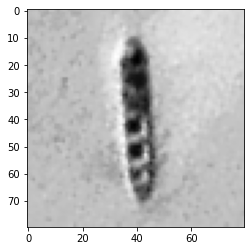

In [15]:
print(sample_pic_gr.shape)
plt.imshow(sample_pic_gr)
plt.set_cmap('Greys')

In [16]:
X_grey = [ color.rgb2gray(i) for i in X]

In [17]:
X_grey = np.array(X_grey)

In [18]:
X_grey.shape

(4000, 80, 80)

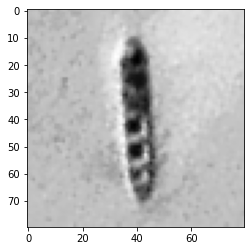

In [19]:
plt.imshow(X_grey[500])

In [20]:
X_grey[:1]

array([[[4.23475169e-08, 4.49073035e-08, 4.58722003e-08, ...,
         4.59067058e-08, 4.32452653e-08, 4.32470348e-08],
        [4.52404376e-08, 4.61717602e-08, 4.56742942e-08, ...,
         5.17942011e-08, 4.49753832e-08, 4.47093975e-08],
        [4.58386261e-08, 4.71702311e-08, 4.42437362e-08, ...,
         4.31463122e-08, 4.60728072e-08, 4.63042874e-08],
        ...,
        [4.46077436e-08, 4.44752164e-08, 4.63042874e-08, ...,
         4.48083505e-08, 4.37780749e-08, 4.52740118e-08],
        [4.47429717e-08, 4.48083505e-08, 4.58386261e-08, ...,
         4.58386261e-08, 4.57396731e-08, 4.61063814e-08],
        [4.47747763e-08, 4.58050519e-08, 4.57060989e-08, ...,
         4.54746187e-08, 4.59738542e-08, 4.61063814e-08]]])

In [21]:
import tensorflow as tf

In [22]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [23]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13232960415249792108
]


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,output_data,test_size=0.2,shuffle=True)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3,shuffle=True)

In [25]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

1149
0


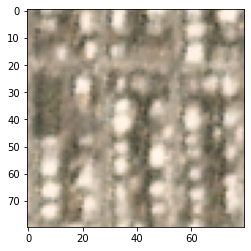

In [26]:
img_id_to_check = np.random.randint(0, X.shape[0] - 1)
im = X[img_id_to_check]

print(img_id_to_check)
print(output_data[img_id_to_check])

plt.imshow(im)
plt.show()

#0=no ship;1=ship

In [27]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
#y = tf.keras.utils.to_categorical(output_data, num_classes=2)


In [43]:
model=Sequential()
model.add(tf.keras.Input(shape=(80,80,3)))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(Conv2D(56,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(450,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(Conv2D(130,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(Conv2D(56,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(35,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(26, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [44]:
model_trained=model.fit(X_train,y_train,batch_size=100,epochs=20,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/20
18/18 [==============================] - 114s 6s/step - loss: 0.5979 - accuracy: 0.7209 - val_loss: 5.5180 - val_accuracy: 0.8013
Epoch 2/20
18/18 [==============================] - 115s 6s/step - loss: 0.2103 - accuracy: 0.9098 - val_loss: 2.1684 - val_accuracy: 0.8058
Epoch 3/20
18/18 [==============================] - 115s 6s/step - loss: 0.1388 - accuracy: 0.9427 - val_loss: 1.3759 - val_accuracy: 0.8326
Epoch 4/20
18/18 [==============================] - 115s 6s/step - loss: 0.1157 - accuracy: 0.9520 - val_loss: 0.5384 - val_accuracy: 0.8527
Epoch 5/20
18/18 [==============================] - 118s 7s/step - loss: 0.0875 - accuracy: 0.9655 - val_loss: 2.0540 - val_accuracy: 0.7812
Epoch 6/20
18/18 [==============================] - 115s 6s/step - loss: 0.0723 - accuracy: 0.9723 - val_loss: 0.4779 - val_accuracy: 0.8750
Epoch 7/20
18/18 [==============================] - 116s 6s/step - loss: 0.0610 - accuracy: 0.9769 - val_loss: 0.1529 - val_accuracy: 0.9353
Epoch 8/20
18

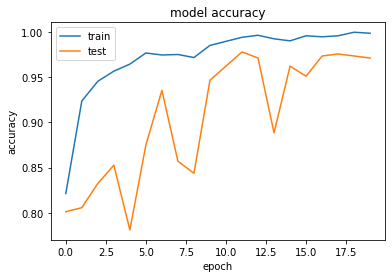

In [45]:
plt.plot(model_trained.history['accuracy'])
plt.plot(model_trained.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

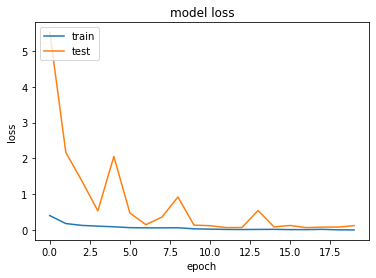

In [46]:
plt.plot(model_trained.history['loss'])
plt.plot(model_trained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
y_pred=model.predict(X_test)

In [67]:
confusion_matrix(y_pred>0.2,y_test)

array([[601,  21],
       [  9, 169]], dtype=int64)

In [68]:
print(classification_report(y_pred>0.2,y_test))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       622
        True       0.89      0.95      0.92       178

    accuracy                           0.96       800
   macro avg       0.94      0.96      0.95       800
weighted avg       0.96      0.96      0.96       800

